# Load Libraries

In [139]:
# Set up libraries 
import pandas as pd 
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Used to display multi outputs in jupyter notebook
from IPython.display import display

# Get stats 
from scipy import stats 

# Local Functions 

### Make plots 


In [140]:
# Import Grid Spec to design plot draw space 
from matplotlib.gridspec import GridSpec

# Set rcParams
plt.rcParams['figure.figsize'] = [50, 50]
plt.rcParams['figure.facecolor'] = 'w'

# Set up grid space and plot size
plt.figure(100, figsize = (5, 5), frameon = False, dpi=200, constrained_layout = True )

# Create function to formate axes 
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelbottom = True, labelleft = True)

# Make plots functions 
def Make_Plots(indata, var_array = [], plt_type = 'dist', inx = '', iny = '', width = 1, height = 1):
    
    # Close all plts
    plt.close()
    
    # Create plot figure object 
    fig = plt.figure()

    # Make grid space
    gs = GridSpec(width, height, figure = fig)

    # Create plot axes array
    ax = []

    # Make plots 

    w = 0 
    h = 0
    
    for i in range(0, len(var_array)):

        ax.append(i)

        if h == height: 
            h = 0
            w += 1 # inc

        # Add figure to grid 
        ax[i] = fig.add_subplot(gs[w,h])
        
        # Dist Plot
        if plt_type == 'dist':
            ax[i].plot = sb.distplot(indata[var_array[i]], hist = False, bins = 100)
        
            # Set X and Y labels 
            ax[i].set(title = var_array[i], ylabel = 'Freq', xlabel = 'Value')
        # Box Plot
        elif plt_type == 'box':
            ax[i].plot = sb.boxplot(x = indata[var_array[i]])
            
            # Set X and Y labels 
            ax[i].set(title = var_array[i], xlabel = 'Value')
        # Scatter Plot
        elif plt_type == 'scatter':
            ax[i].plot = sb.scatterplot(y = iny, x = var_array[i], data = indata)
            
            # Set X and Y labels 
            ax[i].set(title = (iny + " vs " + var_array[i]), xlabel = var_array[i], ylabel = iny)
        # Regline Plot
        elif plt_type == 'regline':
            ax[i].plot = sb.regplot(y = iny, x = var_array[i], data = indata, scatter = False)
            
            # Set X and Y labels 
            ax[i].set(title = (iny + " vs " + var_array[i]), xlabel = var_array[i], ylabel = iny)
        else: 
            ax[i].hist(indata[var_array[i]], bins = 100)

        
        h += 1 # inc

    # call formate function 
    format_axes(fig)

    # Show plots 
    plt.show()

<Figure size 1000x1000 with 0 Axes>

# Load Dataset 

In [141]:
# Get Data cdr = Cohort Default Rate 
cdr = pd.read_csv('CDR_clean.csv')
cdr.head()

,Unnamed: 0,opeid,stateabv,state,county,city,zipcode,proglength,schooltype,cohort2016,...,educationcollegeorabove,laborforceparticipation,unemploymentrate,racewhite,raceblack,raceasian,racenative,racepacific,raceother,racemultiple
0,1,1003,AL,Alabama,Montgomery,Montgomery,36109,8,2,1371,...,31.8,61.8,7.9,34.1,60.0,2.5,0.2,0.0,1.3,1.9
1,2,1004,AL,Alabama,Shelby,Montevallo,35115,8,1,757,...,26.6,57.9,10.8,71.4,23.0,0.5,0.0,0.2,3.4,1.5
2,3,1005,AL,Alabama,Montgomery,Montgomery,36104,8,1,1874,...,31.8,61.8,7.9,34.1,60.0,2.5,0.2,0.0,1.3,1.9
3,4,1007,AL,Alabama,Tallapoosa,Alexander City,35010,5,1,468,...,15.5,51.0,11.6,59.3,35.8,1.0,0.3,0.0,2.8,0.8
4,5,1008,AL,Alabama,Limestone,Athens,35611,8,1,893,...,27.0,58.6,8.8,76.4,16.4,1.6,1.3,0.3,1.7,2.4


# Numeric Data Exploration & Preprocessing
1.	Identification of variables and data types
2.	Analyzing the basic metrics
3.	Non-Graphical Univariate Analysis
4.	Graphical Univariate Analysis
5.	Bivariate Analysis
6.	Variable transformations
7.	Missing value treatment
8.	Outlier treatment
9.	Correlation Analysis
10.	Dimensionality Reduction

# 1. Identification Numeric Variables

In [142]:
## Ordinal 
ordinal = ['opeid','zipcode','schooltype','ethniccode','region','lat','lng','military']

## numerical
numerical = []
for n in cdr._get_numeric_data().columns:
    if n not in ordinal:
        numerical.append(n)

## categorical 
categorical = []
for c in list(cdr.columns):
    if c not in list(cdr._get_numeric_data().columns):
        categorical.append(c)


print("Numerical: \n", list(numerical), "\n\nCategorical: \n", list(categorical), "\n\nOrdinal\n", list(ordinal))

Numerical: 
 ['Unnamed: 0', 'proglength', 'cohort2016', 'cdr2016', 'averageorgreaterthan30', 'cohort2015', 'cdr2015', 'cohort2014', 'cdr2014', 'population', 'density', 'agemedian', 'male', 'female', 'married', 'familysize', 'incomehouseholdmedian', 'incomehouseholdsixfigure', 'homeownership', 'homevalue', 'rentmedian', 'educationcollegeorabove', 'laborforceparticipation', 'unemploymentrate', 'racewhite', 'raceblack', 'raceasian', 'racenative', 'racepacific', 'raceother', 'racemultiple'] 

Categorical: 
 ['stateabv', 'state', 'county', 'city', 'prate2016', 'congdis', 'prate2015', 'prate2014'] 

Ordinal
 ['opeid', 'zipcode', 'schooltype', 'ethniccode', 'region', 'lat', 'lng', 'military']


# 2. Analyzing the basic metrics

In [143]:
# Get basic metrics of numerical variables 
cdr[numerical].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4259.0,2.232774e+03,1.290545e+03,1.00,1113.50,2237.00,3356.50,4455.00
proglength,4259.0,5.817093e+00,2.043935e+00,1.00,4.00,6.00,8.00,11.00
cohort2016,4259.0,1.002358e+03,2.693864e+03,3.00,92.00,317.00,949.50,111509.00
cdr2016,4259.0,1.029598e+01,7.420402e+00,0.00,4.60,8.70,14.80,66.60
averageorgreaterthan30,4259.0,9.063160e-02,2.871182e-01,0.00,0.00,0.00,0.00,1.00
cohort2015,4259.0,1.067870e+03,3.101318e+03,1.00,96.00,341.00,1014.00,139070.00
cdr2015,4259.0,1.042538e+01,7.745664e+00,0.00,4.50,9.00,15.00,100.00
cohort2014,4259.0,1.071821e+03,3.311209e+03,0.00,92.00,348.00,1031.50,159144.00
cdr2014,4259.0,1.083383e+01,8.374001e+00,0.00,4.60,9.40,15.70,100.00
population,4259.0,1.031716e+06,2.959840e+06,241.00,21571.50,74618.00,416581.00,19354922.00


#### Notes

    [Unnamed: 0] is unknown
    [proglength] min is 1 and max is 11.
    [averageorgreaterthan30] min is 0 and max is 1. Might have to do a frequency for this variable
    [familysize] more information is need to understand family size

In [144]:
# Explore numerical variable mensioned above
cdr['Unnamed: 0'].head()

# cdr['Unnamed: 0'] variable represents the index created when dataframe was saved 
# Remove Unnamed: 0
numerical.remove('Unnamed: 0')

In [145]:
# Need to find the unit of masurement for familysize. 
cdr['familysize'].head()

0    3.16
1    3.32
2    3.16
3    2.95
4    3.33
Name: familysize, dtype: float64

In [146]:
# averageorgreaterthan30 is binary data 
cdr.groupby('averageorgreaterthan30').averageorgreaterthan30.agg('count')

numerical.remove('averageorgreaterthan30')

In [147]:
# 'proglength' has does not contain any value in of 9 & 10 
# 8 year programs are the majority 
cdr.groupby('proglength').proglength.agg('count')

proglength
1        3
2       66
3      857
4      199
5      990
6      444
7       22
8     1651
11      27
Name: proglength, dtype: int64

#### Notes
    
    ['Unnamed: 0'] variable represents the index created when dataframe was saved 
    [averageorgreaterthan30] is binary data

# 3. Non-Graphical Univariate Analysis

In [148]:
# Get shape of numerical data 
skewed_vars = []

# Get variable shape 
for n in numerical:
    if cdr[n].skew() > 1: 
        skewed_vars.append(n)
        print(round(cdr[n].skew(), 2), " Right ", n)
    elif cdr[n].skew() < -1: 
        skewed_vars.append(n)
        print(round(cdr[n].skew(), 2), " Left ", n)
    else: 
        print(round(cdr[n].skew(),2), " Semetric ", n)

-0.11  Semetric  proglength
19.53  Right  cohort2016
1.23  Right  cdr2016
23.64  Right  cohort2015
1.59  Right  cdr2015
28.12  Right  cohort2014
2.22  Right  cdr2014
4.6  Right  population
4.12  Right  density
0.23  Semetric  agemedian
3.09  Right  male
-3.09  Left  female
-0.12  Semetric  married
1.08  Right  familysize
2.42  Right  incomehouseholdmedian
1.31  Right  incomehouseholdsixfigure
0.34  Semetric  homeownership
3.15  Right  homevalue
1.31  Right  rentmedian
0.93  Semetric  educationcollegeorabove
-1.12  Left  laborforceparticipation
1.85  Right  unemploymentrate
-0.73  Semetric  racewhite
1.61  Right  raceblack
3.72  Right  raceasian
14.56  Right  racenative
16.54  Right  racepacific
2.61  Right  raceother
5.21  Right  racemultiple


#### Notes 

##### 1. variables distribution

proglength : **Symmetric**

cohort2016 : **Right Skewed**

cdr2016    : **Right Skewed**

averageorgreaterthan30 : **Symmetric**

cohort2015 : **Right Skewed**

cdr2015    : **Right Skewed**

cohort2014 : **Right Skewed**

cdr2014    : **Right Skewed**

population : **Right Skewed**

density    : **Right Skewed**

agemedian  : **Left Skewed**

male       : **Right Skewed**

female     : **Left Skewed**

married    : **Left Skewed**

familysize : **Left Skewed**

incomehouseholdmedian    : **Right Skewed**

incomehouseholdsixfigure : **Right Skewed**

homeownership : **Right Skewed**

homevalue     : **Right Skewed**

rentmedian    : **Right Skewed**

educationcollegeorabove : **Right Skewed**

laborforceparticipation : **Left Skewed**

unemploymentrate : **Right Skewed**

racewhite    : **Left Skewed**

raceblack    : **Right Skewed**

raceasian    : **Right Skewed**

racenative   : **Right Skewed**

racepacific  : **Symmetric**

raceother    : **Right Skewed**

racemultiple : **Left Skewed**

# 4. Graphical Univariate Analysis

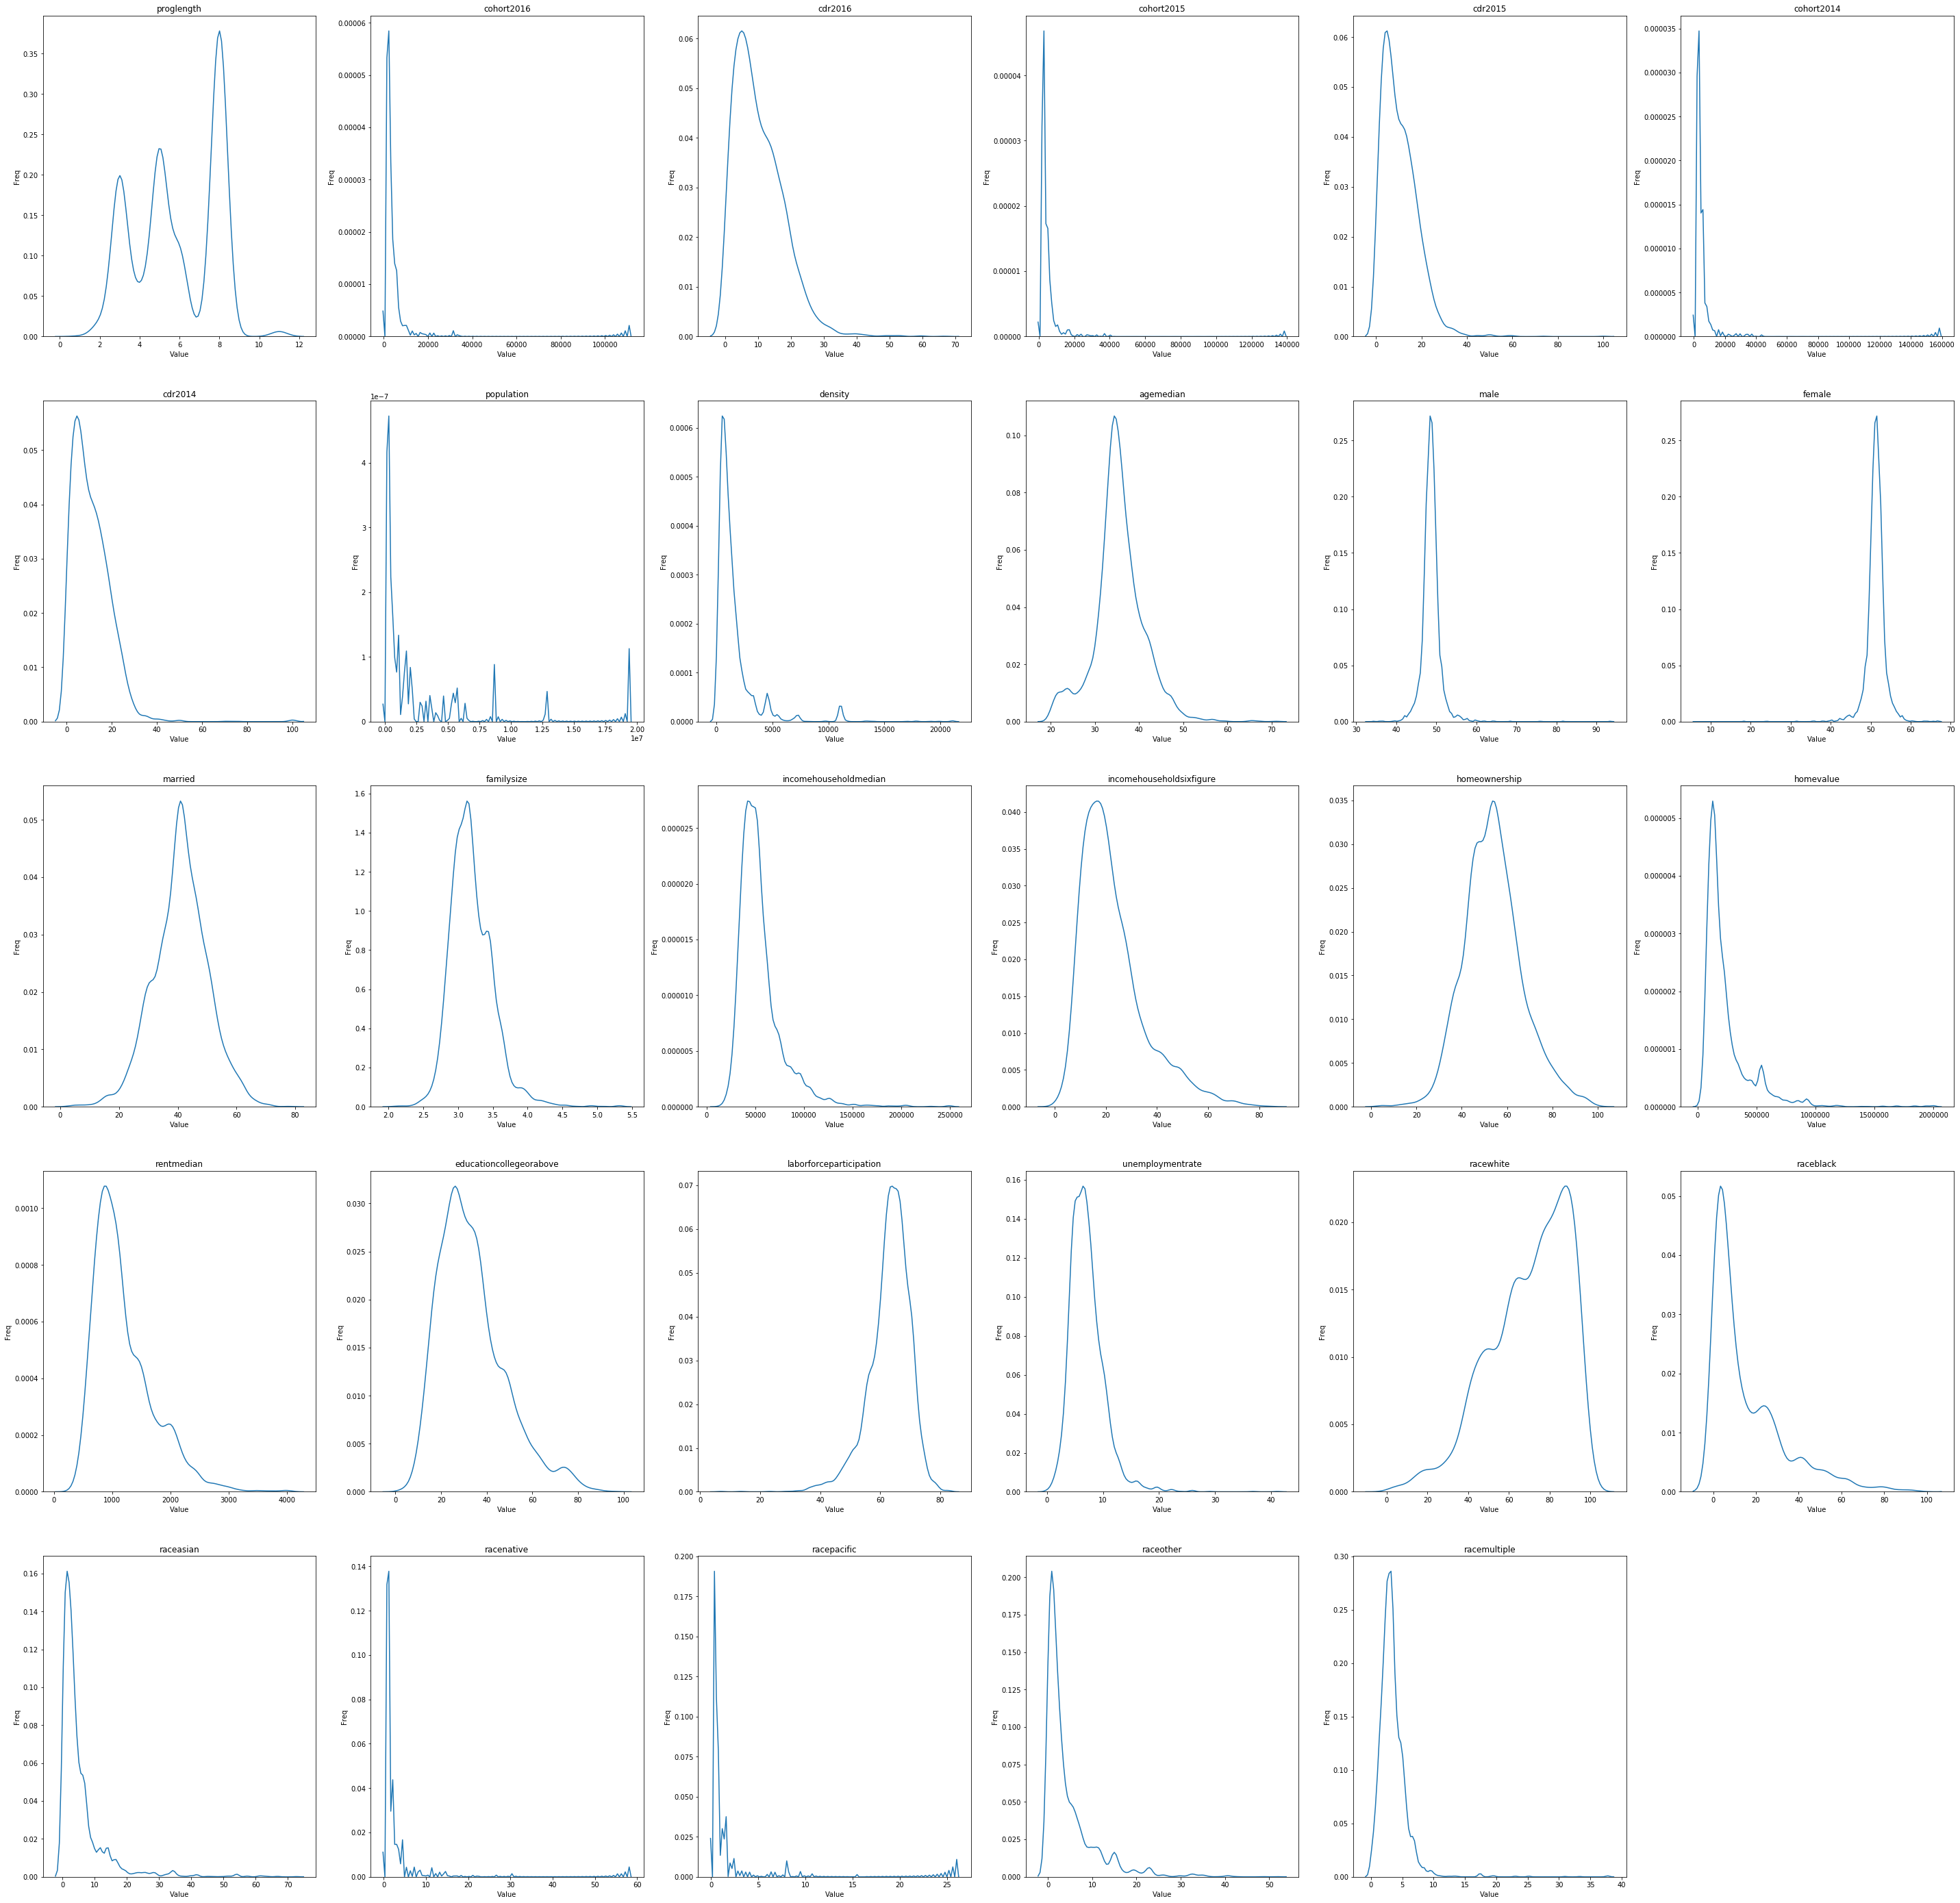

In [149]:
Make_Plots(cdr, numerical, 'dist','', 'cdr2016', 5, 6)

# 5. Bivariate Analysis

# 6. Variable transformations

[DATA TRANSFORMATION](http://abacus.bates.edu/~ganderso/biology/bio270/homework_files/Data_Transformation.pdf)

        A. Log Transform          `np.log(df['col'])`
        B. Square Root Transform  `np.sqrt(df['col'])`
        C. Box-Cox Transform
    
[Negative Transformation](http://core.ecu.edu/psyc/wuenschk/StatHelp/NegSkew.pdf)

[When To Use What](https://www.ibm.com/support/pages/node/420359)

In [150]:
# Make copy of df 
cdr_copy = cdr

cdr_copy.head()

,Unnamed: 0,opeid,stateabv,state,county,city,zipcode,proglength,schooltype,cohort2016,...,educationcollegeorabove,laborforceparticipation,unemploymentrate,racewhite,raceblack,raceasian,racenative,racepacific,raceother,racemultiple
0,1,1003,AL,Alabama,Montgomery,Montgomery,36109,8,2,1371,...,31.8,61.8,7.9,34.1,60.0,2.5,0.2,0.0,1.3,1.9
1,2,1004,AL,Alabama,Shelby,Montevallo,35115,8,1,757,...,26.6,57.9,10.8,71.4,23.0,0.5,0.0,0.2,3.4,1.5
2,3,1005,AL,Alabama,Montgomery,Montgomery,36104,8,1,1874,...,31.8,61.8,7.9,34.1,60.0,2.5,0.2,0.0,1.3,1.9
3,4,1007,AL,Alabama,Tallapoosa,Alexander City,35010,5,1,468,...,15.5,51.0,11.6,59.3,35.8,1.0,0.3,0.0,2.8,0.8
4,5,1008,AL,Alabama,Limestone,Athens,35611,8,1,893,...,27.0,58.6,8.8,76.4,16.4,1.6,1.3,0.3,1.7,2.4


In [151]:
# Transfrom skewed variables

new_vars = []

for v in skewed_vars:
    
    # Positive skewness
    # if positive then we do a log with c = 1
    if cdr_copy[v].skew() > 0:
        nv = (v + "_log")
        
        if cdr_copy[v].isin([0]).any(): # if variable has 0 values then use log(x + 1)
            cdr_copy[nv] = np.log10(cdr_copy[v] + 1)
        else:                      # use log if vars does not contain 0
            cdr_copy[nv] = np.log10(cdr_copy[v])
    
    # Negative Skewness
    ### Reflect neg variable and compute sqrt 
    ### Reflect: gets a value larger than the largest value and is subtracted from all values 
    else:  
        nv = (v + "_sqrt")
        
        cdr_copy[nv] = np.sqrt((cdr_copy[v].max() + 1) - cdr_copy[v])
        
    new_vars.append(nv)
        
# Print new variables 
print(new_vars)

['cohort2016_log', 'cdr2016_log', 'cohort2015_log', 'cdr2015_log', 'cohort2014_log', 'cdr2014_log', 'population_log', 'density_log', 'male_log', 'female_sqrt', 'familysize_log', 'incomehouseholdmedian_log', 'incomehouseholdsixfigure_log', 'homevalue_log', 'rentmedian_log', 'laborforceparticipation_sqrt', 'unemploymentrate_log', 'raceblack_log', 'raceasian_log', 'racenative_log', 'racepacific_log', 'raceother_log', 'racemultiple_log']


In [152]:
# Get skewness 
cdr_copy[new_vars].skew()

cohort2016_log                  0.226422
cdr2016_log                    -0.697440
cohort2015_log                  0.070697
cdr2015_log                    -0.716042
cohort2014_log                 -0.308014
cdr2014_log                    -0.776195
population_log                  0.342806
density_log                    -0.302678
male_log                        1.061660
female_sqrt                     0.218947
familysize_log                  0.556625
incomehouseholdmedian_log       0.627734
incomehouseholdsixfigure_log   -0.155050
homevalue_log                   0.622625
rentmedian_log                  0.259353
laborforceparticipation_sqrt    0.329580
unemploymentrate_log           -0.226417
raceblack_log                  -0.017800
raceasian_log                   0.510540
racenative_log                  2.908547
racepacific_log                 4.991942
raceother_log                   0.492590
racemultiple_log               -0.040442
dtype: float64

Variable whihc are still skewed

    male_log                        1.061660
    racenative_log                  2.908547
    racepacific_log                 4.991942

In [153]:
# Trasform racenative on reciprocal 
cdr_copy['racenative_reciprocal'] = np.reciprocal(cdr_copy['racenative'] + 1)
cdr_copy['racenative_reciprocal'].skew()

-0.87845528014830487

In [154]:
# Trasform male on reciprocal 
cdr_copy['male_reciprocal'] = np.reciprocal(cdr_copy['male'])
cdr_copy['male_reciprocal'].skew()

0.32960286241942383

Note

'racepacific' does can not be trasformed. There for it is left as is. 

In [155]:
# Add to new_vars
new_vars.append('racenative_reciprocal')
new_vars.append('male_reciprocal')
new_vars.append('racepacific')

# Remove log tran
new_vars.remove('racenative_log')
new_vars.remove('male_log')
new_vars.remove('racepacific_log')

In [156]:
# Check skewness
cdr_copy[new_vars].skew()

cohort2016_log                   0.226422
cdr2016_log                     -0.697440
cohort2015_log                   0.070697
cdr2015_log                     -0.716042
cohort2014_log                  -0.308014
cdr2014_log                     -0.776195
population_log                   0.342806
density_log                     -0.302678
female_sqrt                      0.218947
familysize_log                   0.556625
incomehouseholdmedian_log        0.627734
incomehouseholdsixfigure_log    -0.155050
homevalue_log                    0.622625
rentmedian_log                   0.259353
laborforceparticipation_sqrt     0.329580
unemploymentrate_log            -0.226417
raceblack_log                   -0.017800
raceasian_log                    0.510540
raceother_log                    0.492590
racemultiple_log                -0.040442
racenative_reciprocal           -0.878455
male_reciprocal                  0.329603
racepacific                     16.541379
dtype: float64

In [157]:
# Get only normalized numerical values 

## skewed_vars remove 
for n in skewed_vars:
    numerical.remove(n)

## new_vars add
for n in new_vars:
    numerical.append(n)

# print 
numerical 

['proglength',
 'agemedian',
 'married',
 'homeownership',
 'educationcollegeorabove',
 'racewhite',
 'cohort2016_log',
 'cdr2016_log',
 'cohort2015_log',
 'cdr2015_log',
 'cohort2014_log',
 'cdr2014_log',
 'population_log',
 'density_log',
 'female_sqrt',
 'familysize_log',
 'incomehouseholdmedian_log',
 'incomehouseholdsixfigure_log',
 'homevalue_log',
 'rentmedian_log',
 'laborforceparticipation_sqrt',
 'unemploymentrate_log',
 'raceblack_log',
 'raceasian_log',
 'raceother_log',
 'racemultiple_log',
 'racenative_reciprocal',
 'male_reciprocal',
 'racepacific']

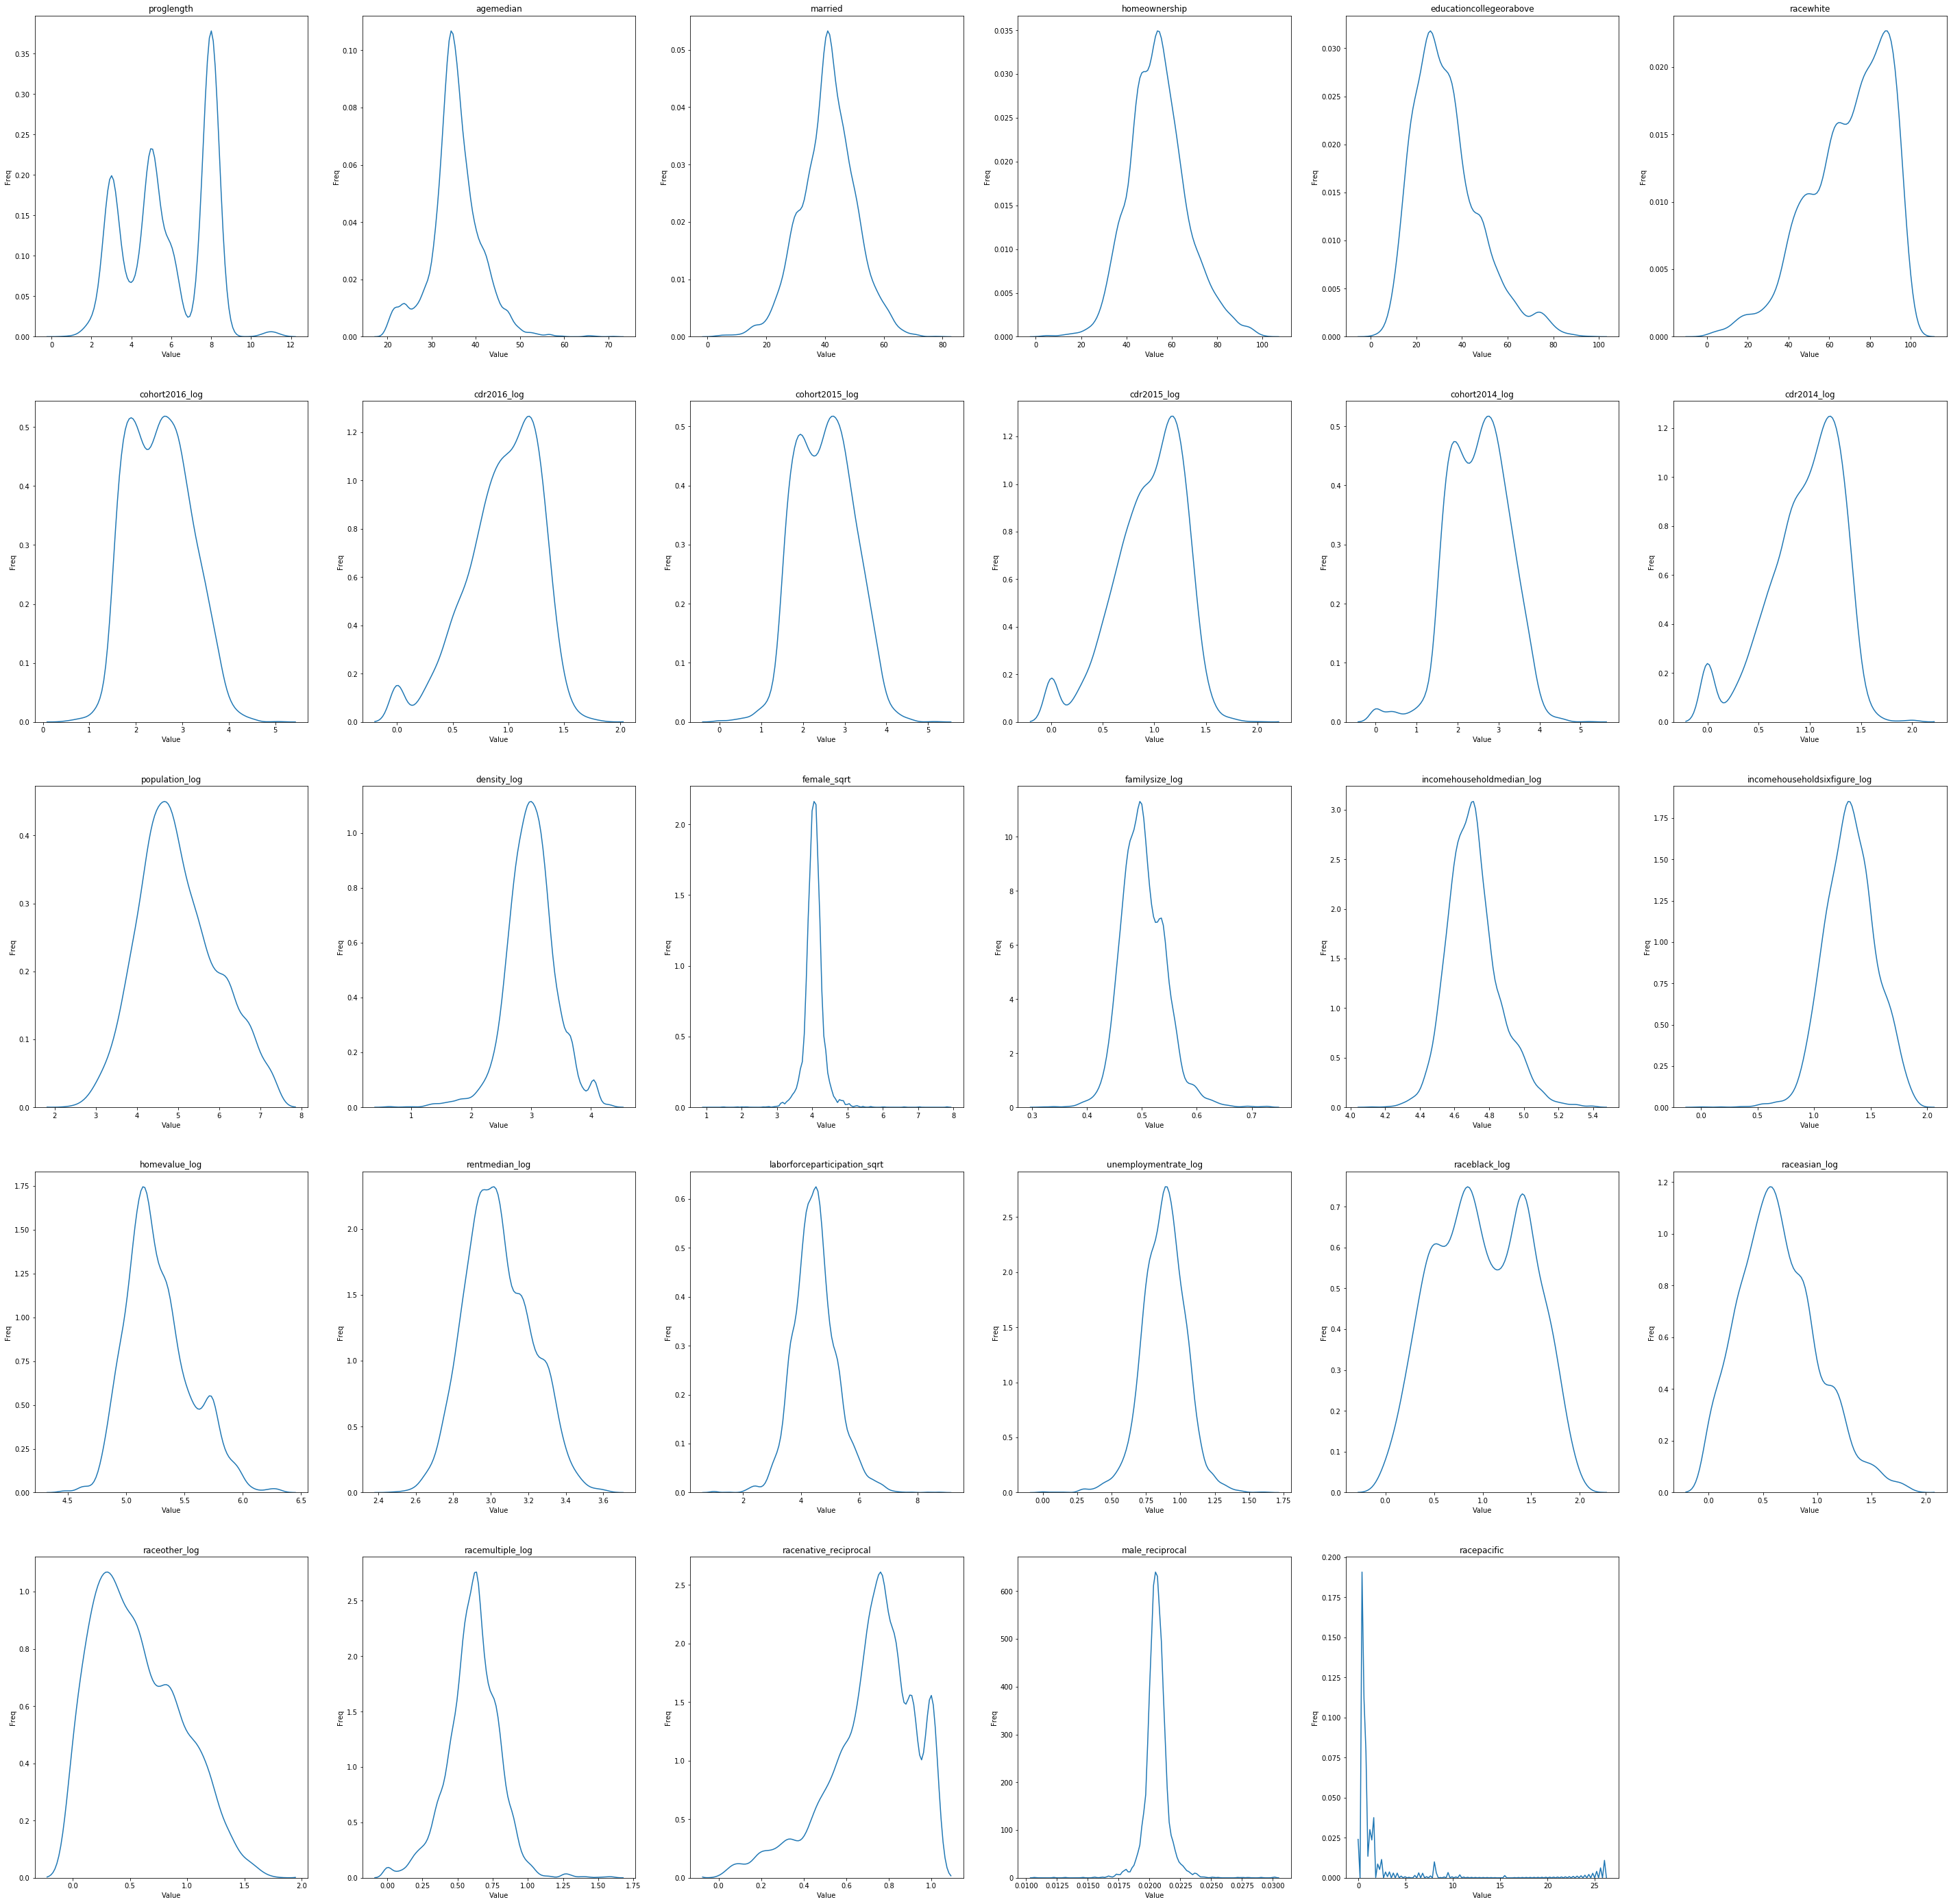

In [158]:
# Make Density plots 
Make_Plots(cdr_copy, numerical, 'dist','None', 'None', 5, 6)

### Resacle Vriabels using min max method 

In [159]:
# New Dataframe x 
X = cdr_copy

# Scaled variables 
for v in numerical: 
    max = cdr_copy[v].max()
    min = cdr_copy[v].min()

    X[v] = (cdr_copy[v] - min) / (max - min)

# Get dis
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4259.0,2.232774e+03,1.290545e+03,1.000000,1113.500000,2237.000000,3356.500000,4.455000e+03
opeid,4259.0,1.468372e+04,1.457010e+04,1003.000000,2734.500000,7187.000000,25486.500000,4.263600e+04
zipcode,4259.0,5.006614e+04,2.946049e+04,1002.000000,24541.000000,48307.000000,76056.000000,9.980100e+04
proglength,4259.0,4.817093e-01,2.043935e-01,0.000000,0.300000,0.500000,0.700000,1.000000e+00
schooltype,4259.0,1.961493e+00,8.180797e-01,1.000000,1.000000,2.000000,3.000000,3.000000e+00
cohort2016,4259.0,1.002358e+03,2.693864e+03,3.000000,92.000000,317.000000,949.500000,1.115090e+05
cdr2016,4259.0,1.029598e+01,7.420402e+00,0.000000,4.600000,8.700000,14.800000,6.660000e+01
ethniccode,4259.0,4.879314e+00,5.431082e-01,1.000000,5.000000,5.000000,5.000000,5.000000e+00
region,4259.0,5.210378e+00,2.513631e+00,1.000000,3.000000,5.000000,7.000000,1.000000e+01
averageorgreaterthan30,4259.0,9.063160e-02,2.871182e-01,0.000000,0.000000,0.000000,0.000000,1.000000e+00


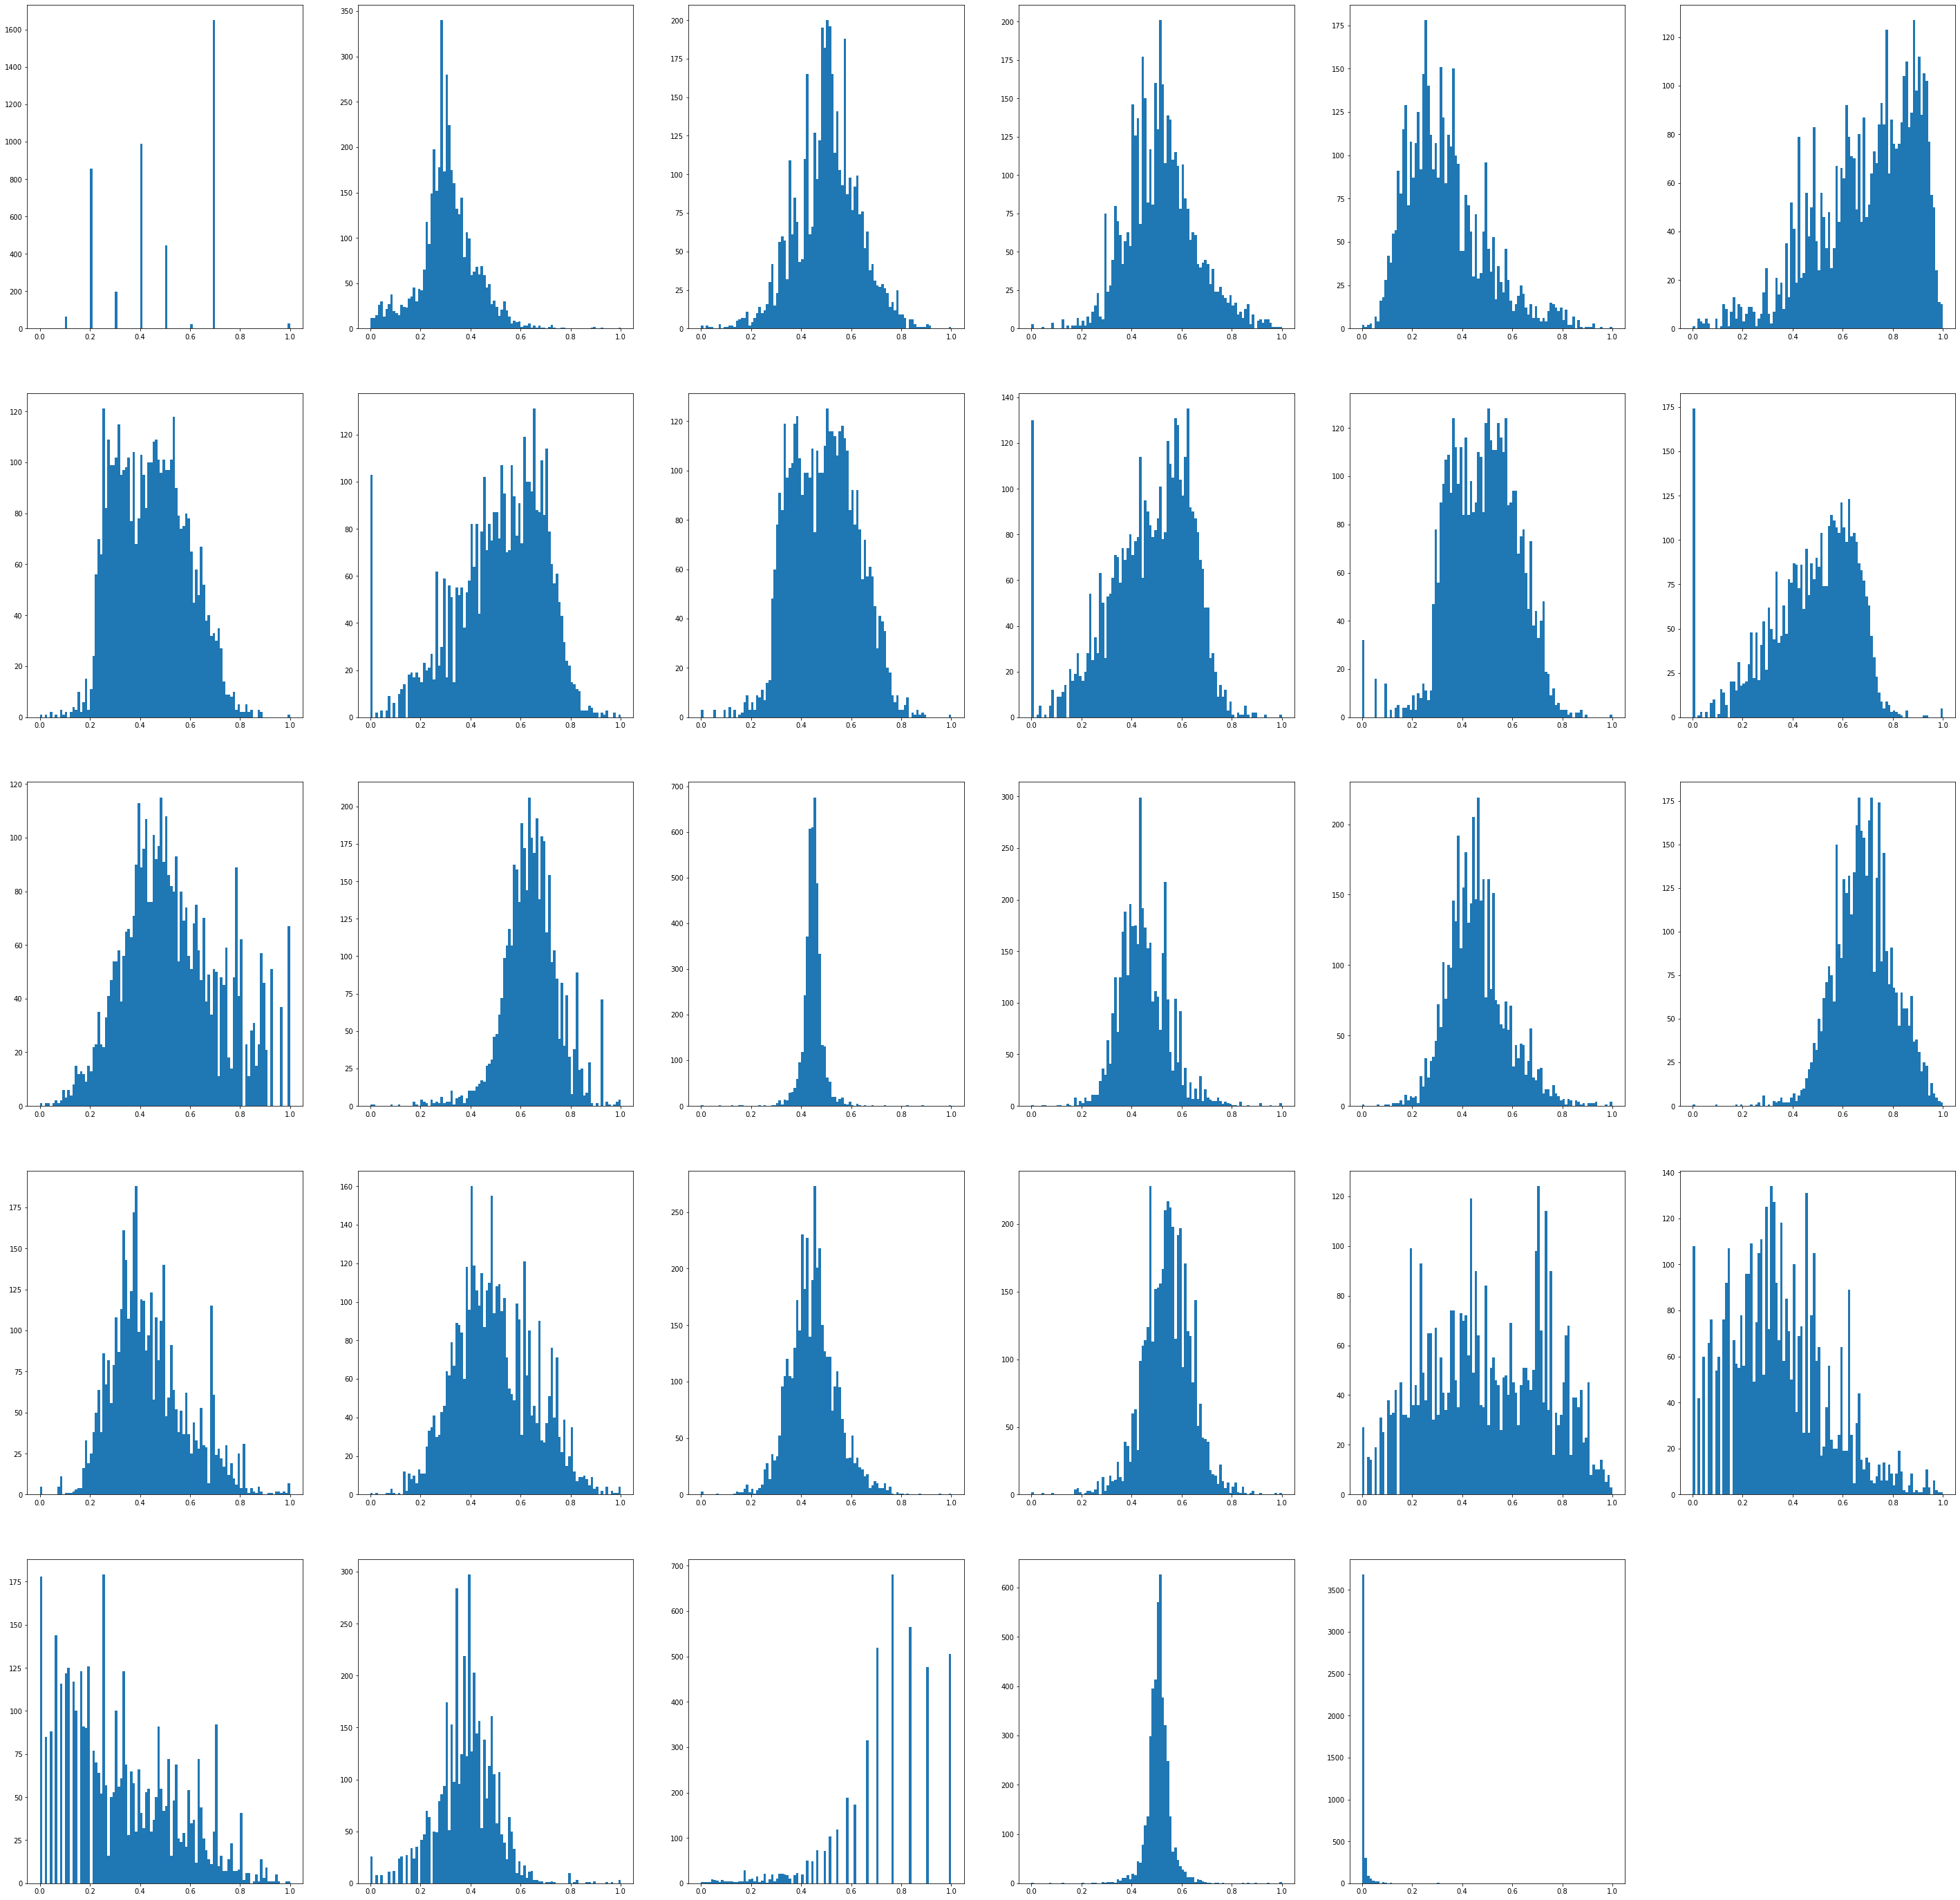

In [160]:
# View distribution 
Make_Plots(X, numerical, 'hist','', 'cdr2016_log', 5, 6)

In [161]:
# Check for nulls
X[numerical].isnull().sum()

proglength                      0
agemedian                       0
married                         0
homeownership                   0
educationcollegeorabove         0
racewhite                       0
cohort2016_log                  0
cdr2016_log                     0
cohort2015_log                  0
cdr2015_log                     0
cohort2014_log                  0
cdr2014_log                     0
population_log                  0
density_log                     0
female_sqrt                     0
familysize_log                  0
incomehouseholdmedian_log       0
incomehouseholdsixfigure_log    0
homevalue_log                   0
rentmedian_log                  0
laborforceparticipation_sqrt    0
unemploymentrate_log            0
raceblack_log                   0
raceasian_log                   0
raceother_log                   0
racemultiple_log                0
racenative_reciprocal           0
male_reciprocal                 0
racepacific                     0
dtype: int64

# 7. Missing value treatment

# 8. Outlier treatment

[Feature Clipping](https://developers.google.com/machine-learning/data-prep/transform/normalization)


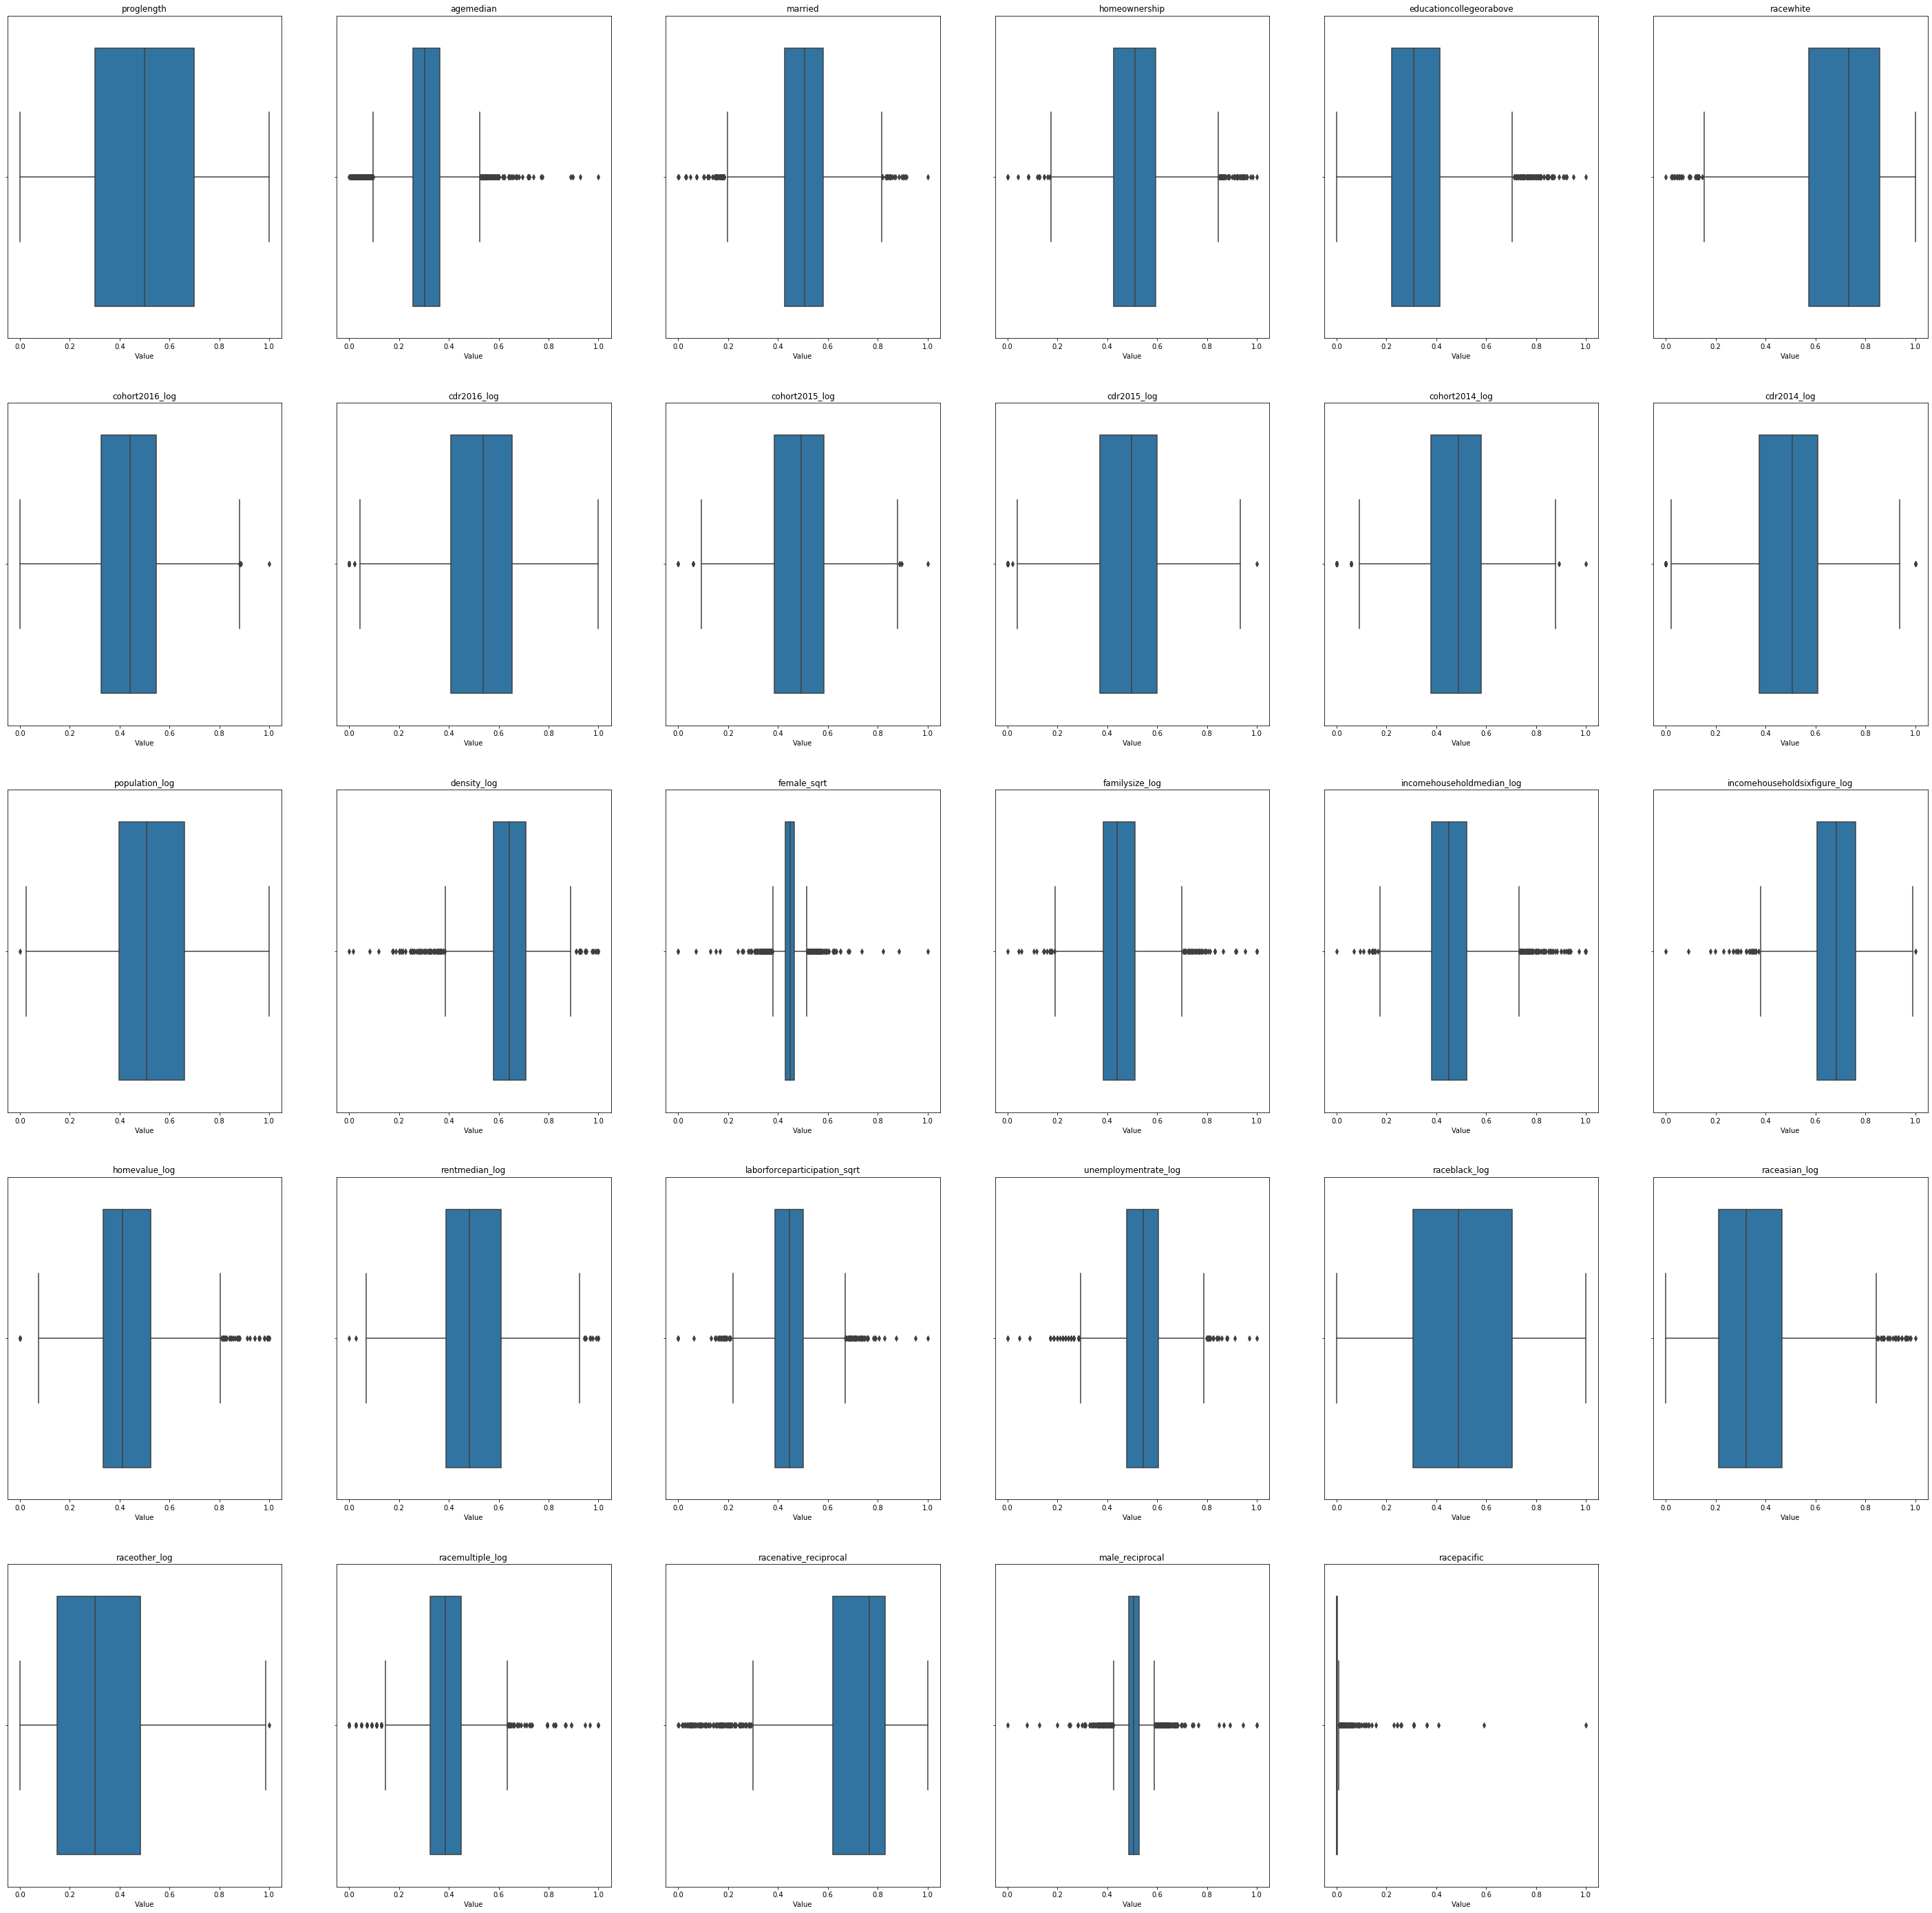

In [163]:
# Get outlier overview  
Make_Plots(X, numerical, 'box','', 'cdr2016_log', 5, 6)

In [164]:
# Get numebr pof outliers in each varibale
j = 0

for n in numerical:
    outliers =  X[n][np.abs(stats.zscore(X[n])) > 3].count()
    
    j = j + outliers
    
    print(n, " : ", outliers)
print('\nTotal: ', j)

proglength  :  0
agemedian  :  24
married  :  23
homeownership  :  32
educationcollegeorabove  :  40
racewhite  :  20
cohort2016_log  :  7
cdr2016_log  :  0
cohort2015_log  :  13
cdr2015_log  :  1
cohort2014_log  :  49
cdr2014_log  :  0
population_log  :  0
density_log  :  47
female_sqrt  :  64
familysize_log  :  40
incomehouseholdmedian_log  :  35
incomehouseholdsixfigure_log  :  19
homevalue_log  :  17
rentmedian_log  :  10
laborforceparticipation_sqrt  :  40
unemploymentrate_log  :  39
raceblack_log  :  0
raceasian_log  :  26
raceother_log  :  2
racemultiple_log  :  58
racenative_reciprocal  :  45
male_reciprocal  :  66
racepacific  :  29

Total:  746


In [166]:
# Remove all outliers in the dataFrame 
O = X
for n in numerical:
    
    id = list(O.iloc[np.abs(stats.zscore(O[n])) > 3].index)
    
    if len(id) > 0: 
        O.drop(axis = 0, index = id, inplace = True)

O[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3584.0,2.224233e+03,1.279106e+03,1.000000,1113.500000,2242.000000,3336.250000,4.455000e+03
opeid,3584.0,1.454597e+04,1.440623e+04,1003.000000,2734.250000,7234.000000,25333.000000,4.263600e+04
zipcode,3584.0,4.981646e+04,2.881463e+04,1002.000000,26101.000000,48156.500000,75230.250000,9.966900e+04
proglength,3584.0,4.816685e-01,2.056593e-01,0.000000,0.300000,0.500000,0.700000,1.000000e+00
schooltype,3584.0,1.972656e+00,8.166083e-01,1.000000,1.000000,2.000000,3.000000,3.000000e+00
cohort2016,3584.0,9.822609e+02,1.843683e+03,4.000000,97.000000,329.000000,997.250000,2.274400e+04
cdr2016,3584.0,1.011244e+01,7.186993e+00,0.000000,4.500000,8.600000,14.600000,5.950000e+01
ethniccode,3584.0,4.882254e+00,5.315372e-01,1.000000,5.000000,5.000000,5.000000,5.000000e+00
region,3584.0,5.177176e+00,2.448606e+00,1.000000,3.000000,5.000000,7.000000,1.000000e+01
averageorgreaterthan30,3584.0,8.677455e-02,2.815437e-01,0.000000,0.000000,0.000000,0.000000,1.000000e+00


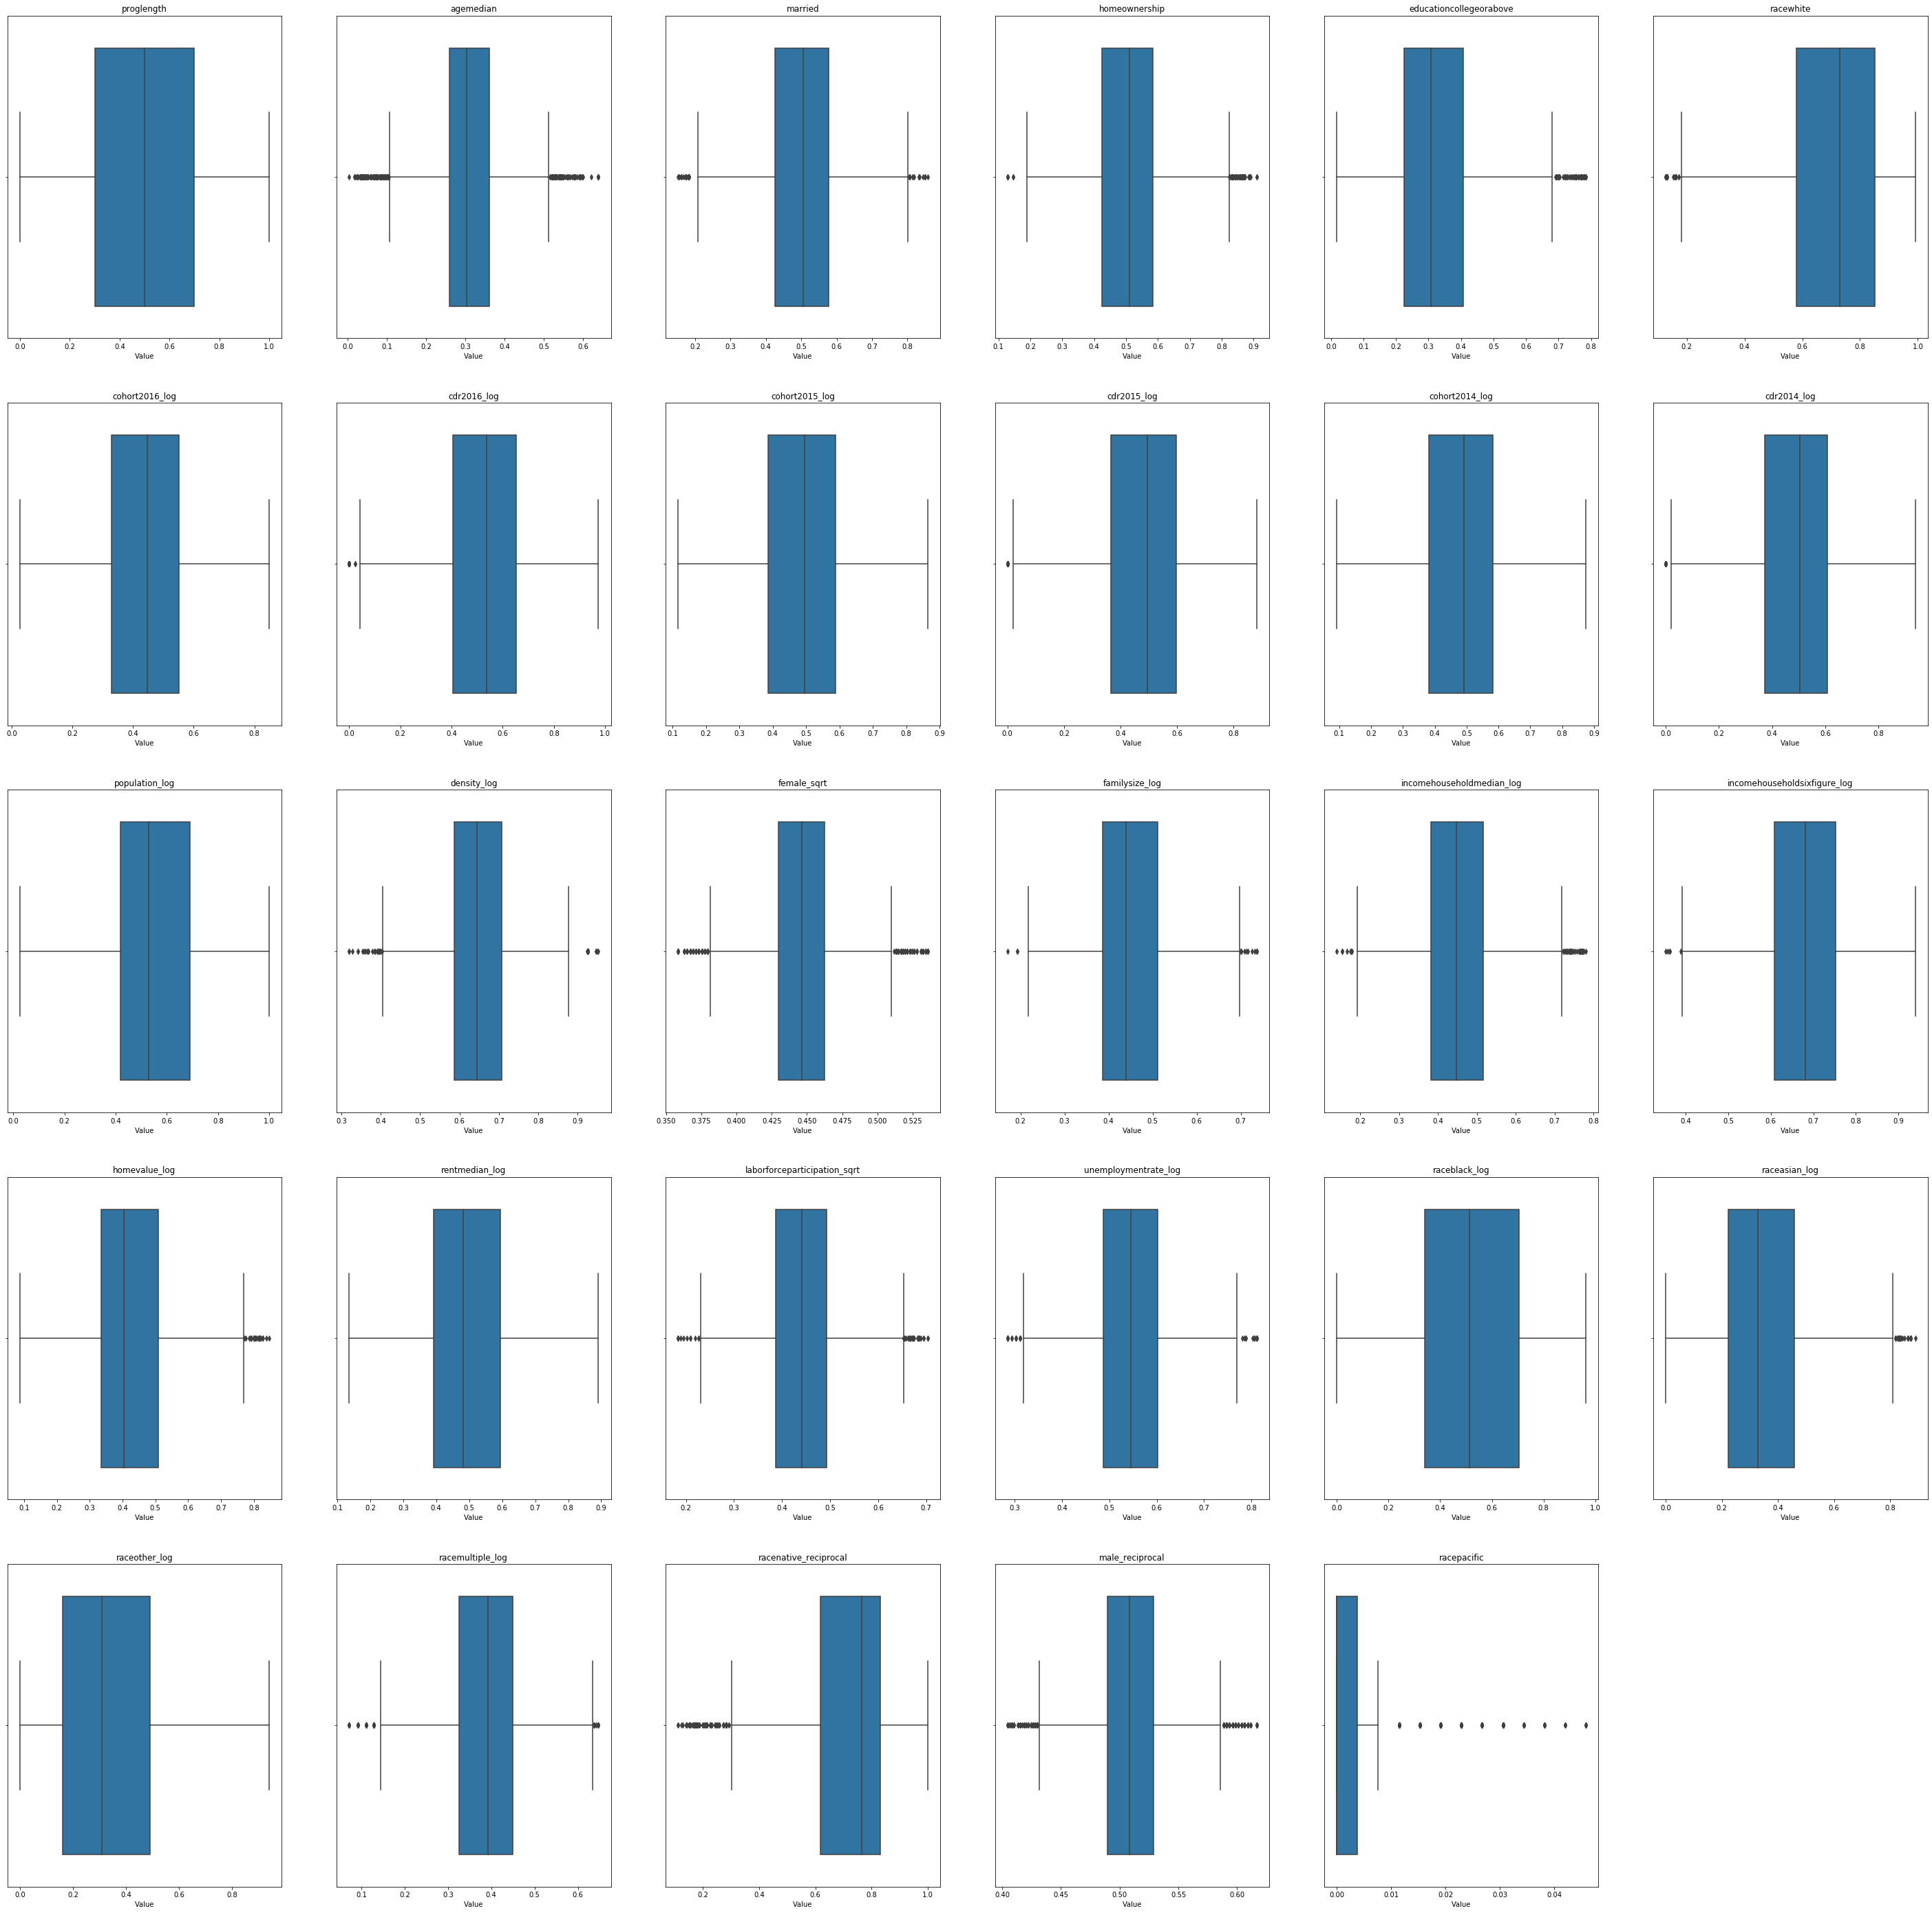

In [167]:
# Veiw box plot
Make_Plots(O, numerical, 'box','', 'cdr2016_log', 5, 6)

##### Notes:

**Outliers** 

    Typical data points that far away from the mean or median. e.g., a heart rate of 140 beats/min for a subject during resting condition. The subject might got a medical condition during the experiment.

**Anomaly** 

    A data point that is not legit due to error in data collection or device issue. e.g. a hear rate of subject of 10 beats/min.

**Outliers-Anomaly**
    
    A data point that is far away from the mean or median, but you cannot decide the source of it.

*It is Okay to remove the anomaly data before the transformation. But for other cases, you have to have a reason for removing the outliers before the transformation. Unless you can justify it, you cannot remove it because it is far away from the group. Maybe it is the side effect of the experiment that should be taken into consideration.*

# 9. Correlation Analysis

In [171]:
# Get get variable we care about 
#print("Numerical: \n", list(numerical), "\n\nCategorical: \n", list(categorical), "\n\nOrdinal\n", list(ordinal))
vars = ordinal 

# Add other variables to list 
vars.extend(categorical)
vars.extend(numerical)

print(vars)

['opeid', 'zipcode', 'schooltype', 'ethniccode', 'region', 'lat', 'lng', 'military', 'stateabv', 'state', 'county', 'city', 'prate2016', 'congdis', 'prate2015', 'prate2014', 'proglength', 'agemedian', 'married', 'homeownership', 'educationcollegeorabove', 'racewhite', 'cohort2016_log', 'cdr2016_log', 'cohort2015_log', 'cdr2015_log', 'cohort2014_log', 'cdr2014_log', 'population_log', 'density_log', 'female_sqrt', 'familysize_log', 'incomehouseholdmedian_log', 'incomehouseholdsixfigure_log', 'homevalue_log', 'rentmedian_log', 'laborforceparticipation_sqrt', 'unemploymentrate_log', 'raceblack_log', 'raceasian_log', 'raceother_log', 'racemultiple_log', 'racenative_reciprocal', 'male_reciprocal', 'racepacific']


In [175]:
# Create clean dataset 
cdrC = O[vars]

cdrC.describe().T

# drop military from dataset 
cdrC.drop('military', axis = 1, inplace = True)

c:\program files\python36\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


##### Notes 

    Pandas has two method by which teh correlation can be computed. Kendall, Pearson & Spearman
    
1. Kendall Tau
    - Pairs of observations are independent.
    - Two variables should be measured on an ordinal, interval or ratio scale.
    - It assumes that there is a monotonic relationship between the two variables.

2. Pearson
    - Each observation should have a pair of values.
    - Each variable should be continuous.
    - Each variable should be normally distributed.
    - It should be the absence of outliers.
    - It assumes linearity and homoscedasticity.

3. Spearman
    - Pairs of observations are independent.
    - Two variables should be measured on an ordinal, interval or ratio scale.
    - It assumes that there is a monotonic relationship between the two variables.

In [206]:
# Pearson correlation matrix 
p_corr = round(cdrC[numerical].corr(method = 'pearson'), 2)
k_corr = round(cdrC[numerical].corr(method = 'kendall'), 2)

In [207]:
p_corr

,proglength,agemedian,married,homeownership,educationcollegeorabove,racewhite,cohort2016_log,cdr2016_log,cohort2015_log,cdr2015_log,...,rentmedian_log,laborforceparticipation_sqrt,unemploymentrate_log,raceblack_log,raceasian_log,raceother_log,racemultiple_log,racenative_reciprocal,male_reciprocal,racepacific
proglength,1.00,-0.20,-0.18,-0.15,0.14,-0.09,0.47,-0.41,0.47,-0.39,...,0.04,0.00,0.03,0.09,0.07,0.02,0.03,-0.01,0.01,-0.02
agemedian,-0.20,1.00,0.55,0.49,-0.03,0.18,-0.20,0.06,-0.19,0.08,...,0.13,0.03,-0.20,-0.20,-0.08,-0.13,-0.15,0.16,0.18,-0.06
married,-0.18,0.55,1.00,0.70,0.12,0.45,-0.17,0.07,-0.16,0.07,...,0.26,-0.33,-0.55,-0.54,0.09,-0.01,-0.08,-0.02,-0.10,0.14
homeownership,-0.15,0.49,0.70,1.00,0.03,0.47,-0.10,0.08,-0.10,0.07,...,-0.04,-0.08,-0.42,-0.41,-0.20,-0.32,-0.22,0.11,0.04,-0.07
educationcollegeorabove,0.14,-0.03,0.12,0.03,1.00,0.02,0.06,-0.23,0.05,-0.23,...,0.60,-0.41,-0.42,-0.10,0.55,-0.07,0.08,0.08,-0.08,0.05
racewhite,-0.09,0.18,0.45,0.47,0.02,1.00,-0.05,0.02,-0.04,0.03,...,-0.20,0.00,-0.50,-0.81,-0.35,-0.42,-0.13,-0.02,-0.16,-0.01
cohort2016_log,0.47,-0.20,-0.17,-0.10,0.06,-0.05,1.00,0.02,0.98,0.05,...,-0.03,0.02,0.05,0.08,0.01,-0.03,-0.00,-0.02,-0.02,-0.04
cdr2016_log,-0.41,0.06,0.07,0.08,-0.23,0.02,0.02,1.00,0.03,0.84,...,-0.20,0.08,0.06,0.02,-0.20,-0.07,-0.08,-0.03,0.01,-0.00
cohort2015_log,0.47,-0.19,-0.16,-0.10,0.05,-0.04,0.98,0.03,1.00,0.06,...,-0.04,0.03,0.05,0.07,0.01,-0.03,-0.00,-0.02,-0.02,-0.03
cdr2015_log,-0.39,0.08,0.07,0.07,-0.23,0.03,0.05,0.84,0.06,1.00,...,-0.19,0.10,0.08,0.00,-0.19,-0.04,-0.07,-0.03,0.00,0.01


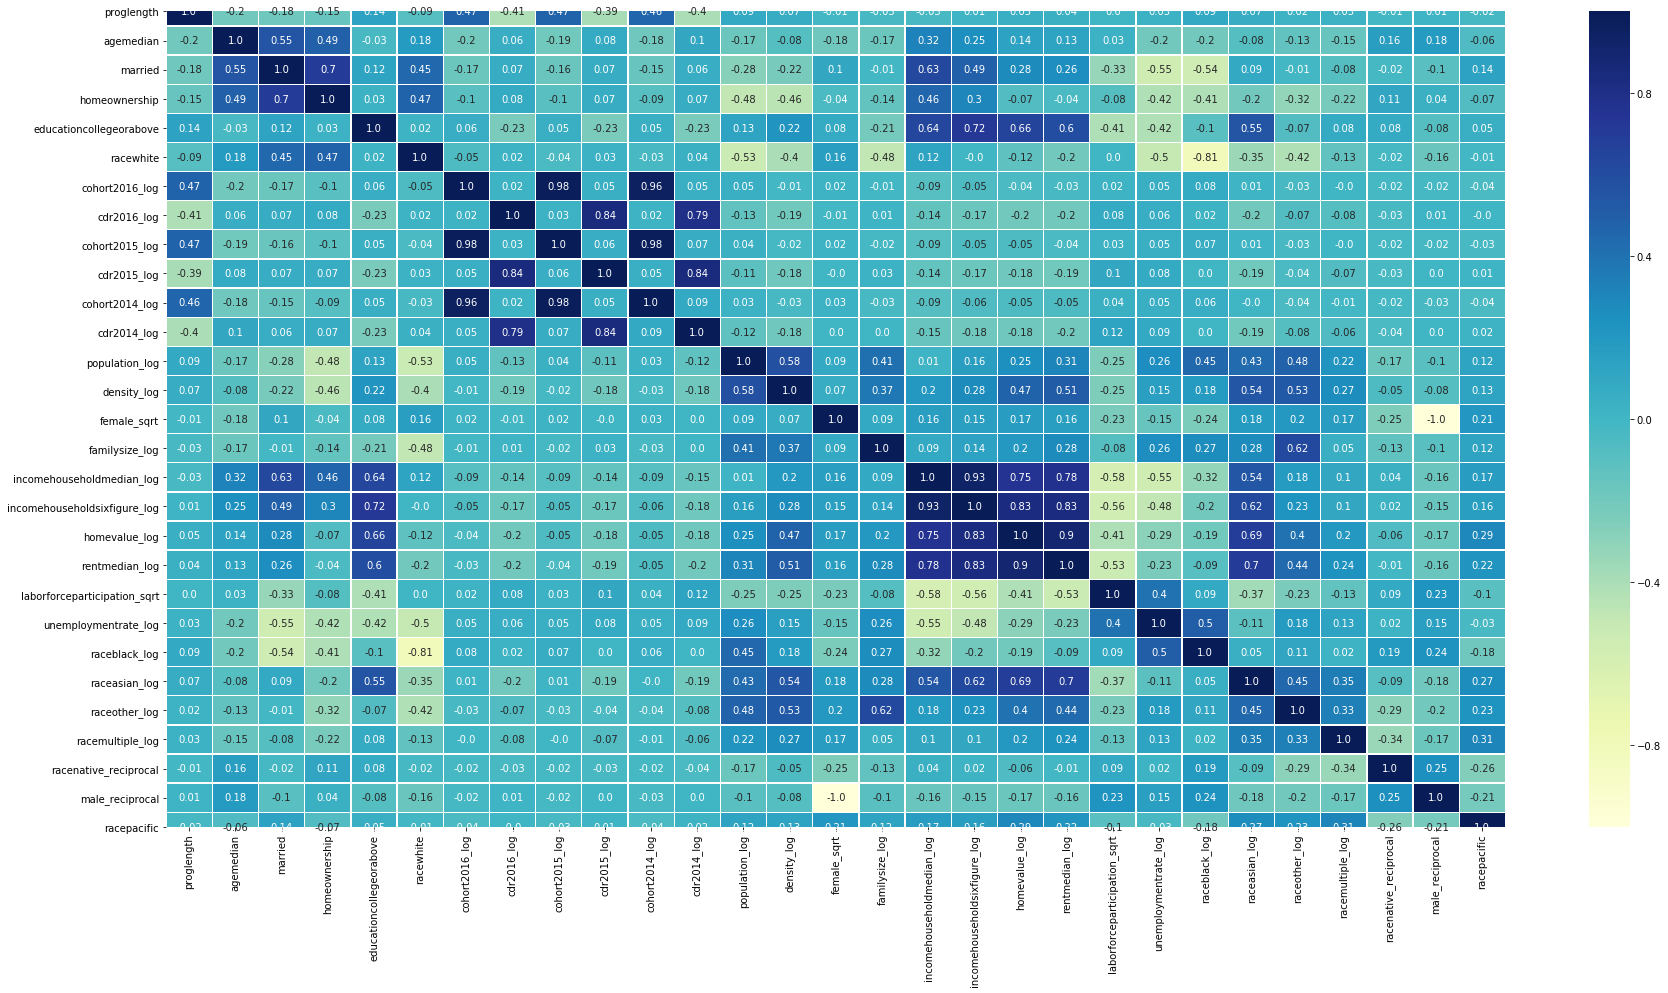

In [219]:
# Pearson Correlation 
plt.rcParams['figure.figsize'] = [30, 15]
sb.heatmap(p_corr, fmt = "",cmap="YlGnBu",  linewidths = 0.30, center = 0, vmin = -1, vmax = 1, annot = True)

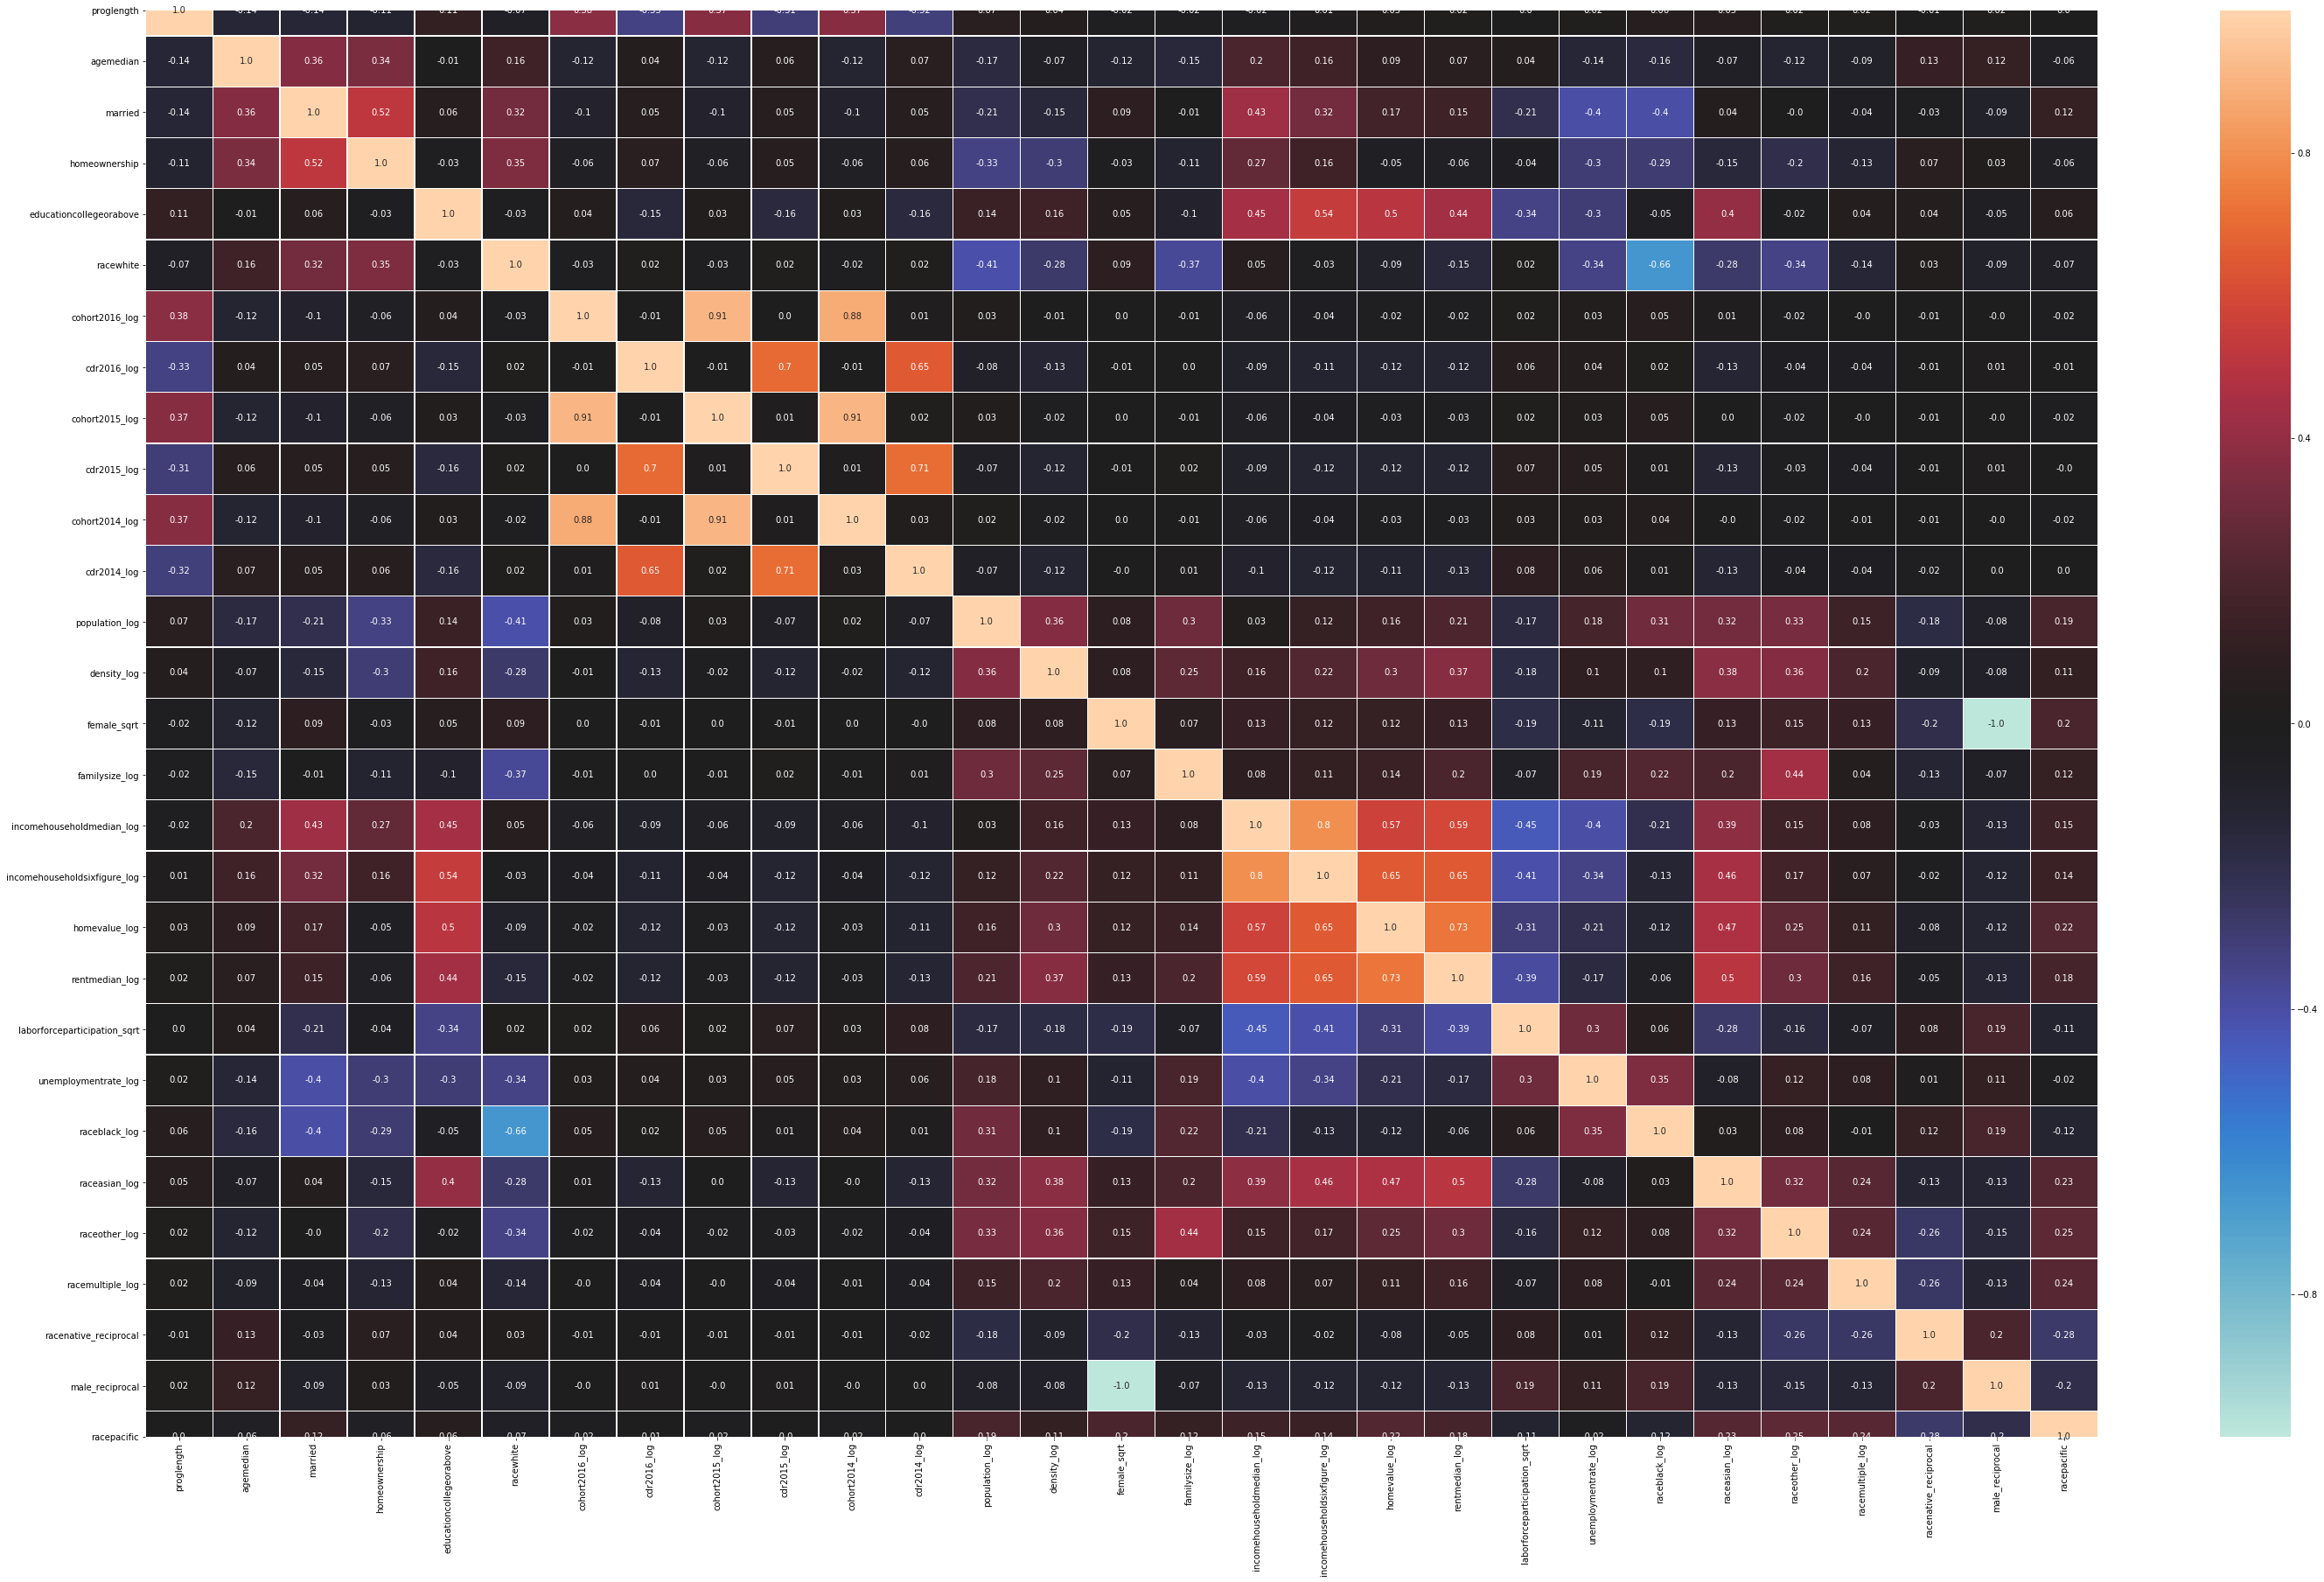

In [210]:
# Kendall Correlation 
plt.rcParams['figure.figsize'] = [50, 30]
sb.heatmap(k_corr, fmt = "",  linewidths = 0.30, center = 0, vmin = -1, vmax = 1, annot = True)

# 10. Dimensionality Reduction